In [1]:
# 파이썬으로 크롬 제어하는 selenium
from selenium import webdriver
# 문자열을 띄어쓰기 및 줄 바꿈을 통해 파스(parse)해서 읽기 좋게 만들어주는 라이브러리
from bs4 import BeautifulSoup
# 시간 라이브러리
import time
# 데이터분석 라이브러리
import pandas as pd

In [2]:
browser = webdriver.Chrome('/Users/je/pandasProject/chromedriver')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)

/var/folders/c1/rsntflqd7vx6774s642zmw6h0000gn/T/ipykernel_69721/3452525071.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('/Users/je/pandasProject/chromedriver')


In [3]:
# html 코드 전체 불러오기
html = browser.page_source
html

'<html lang="ko"><head>\n    <meta charset="utf-8">\n    <meta http-equiv="imagetoolbar" content="no">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>유튜브 랭킹 1 페이지</title>\n    <link rel="stylesheet" href="/css/default.css?ver=2022022">\n<link rel="stylesheet" href="/css/bootstrap.css?ver=2022022">\n<link rel="stylesheet" href="/css/nifty.min.css?ver=2022022">\n<link rel="stylesheet" href="/css/premium/icon-sets/icons/line-icons/premium-line-icons.min.css?ver=2022022">\n<link rel="stylesheet" href="/css/themes/type-c/theme-well-red.css?ver=2022022">\n<link rel="stylesheet" href="https://youtube-rank.com/board/theme/youtube/skin/outlogin/youtuberank/style.css?ver=2022022">\n<link rel="stylesheet" href="https://youtube-rank.com/board/skin/board/sns_channel/list.skin.css?2022022">\n<link rel="stylesheet" href="https://unpkg.com/aos@2.3.1/dist/aos.css">\n    <link rel="apple-touch-icon" sizes="180x180" href="/img/apple-touch-icon.png">\n    <link rel="shortcut icon" href

In [4]:
# 사람이 읽을 수 있게 태그 정리
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>유튜브 랭킹 1 페이지</title>
<link href="/css/default.css?ver=2022022" rel="stylesheet"/>
<link href="/css/bootstrap.css?ver=2022022" rel="stylesheet"/>
<link href="/css/nifty.min.css?ver=2022022" rel="stylesheet"/>
<link href="/css/premium/icon-sets/icons/line-icons/premium-line-icons.min.css?ver=2022022" rel="stylesheet"/>
<link href="/css/themes/type-c/theme-well-red.css?ver=2022022" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/theme/youtube/skin/outlogin/youtuberank/style.css?ver=2022022" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/skin/board/sns_channel/list.skin.css?2022022" rel="stylesheet"/>
<link href="https://unpkg.com/aos@2.3.1/dist/aos.css" rel="stylesheet"/>
<link href="/img/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/favicon.ico" rel="shortcut icon" type="image

In [5]:
# 유튜브 채널 가져오기
channel_list = soup.select('tr')
print(len(channel_list), '\n') # '\n'란 줄 바꿈을 의미
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [6]:
# TOP 100이어야하는데 102니까 다른 곳에 있는 tr이 함께 끌려온 것 같다. 필요한 tr만 골라내자.
# from 아래 table 아래 tbody 아래 tr이 있다.
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [7]:
# 첫 번째 채널 관련 정보 가져오기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLQ36QGusRG7UR-Cz9rBFNGtLf_uLqKP0aJ9EfTMww=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLQ36QGusRG7UR-Cz9rBFNGtLf_uLqKP0aJ9EfTMww=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [8]:
# 카테고리
category = channel.select('p.category')[0]
category

<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>

In [9]:
category.text

'[음악/댄스/가수]\n                                \n                                '

In [10]:
category.text.strip()

'[음악/댄스/가수]'

In [11]:
category = channel.select('p.category')[0].text.strip()
category

'[음악/댄스/가수]'

In [12]:
# 채널 제목
title = channel.select('h1 > a')[0].text.strip()
title

'BLACKPINK'

In [13]:
# 구독자 수
subscriber = channel.select('.subscriber_cnt')[0].text
subscriber

# 조회 수
view = channel.select('.view_cnt')[0].text
view

# 영상 개수
video = channel.select('.video_cnt')[0].text
video

'395개'

In [14]:
print(subscriber, view, video)

7520만 242억9434만 395개


In [16]:
results = []
channel_list = soup.select('form > table > tbody > tr')
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text
    data = [title, category, subscriber, view, video]
    results.append(data)

In [24]:
# 1천 개짜리 도전(WebDriverException: Message: unknown error: unexpected command response 뜨면 컴퓨터가 받쳐주지 못하는 것)
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [25]:
# page 대신 x 써도 됨
for page in range(1,11):
    url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
    print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=3
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=4
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=5
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=6
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=7
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=8
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=9
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=10


In [3]:
results = []

for page in range(1,11):
    url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
    browser.get(url)
    time.sleep(2)

WebDriverException: Message: unknown error: unexpected command response
  (Session info: chrome=103.0.5060.114)
Stacktrace:
0   chromedriver                        0x000000010cec5d19 chromedriver + 5197081
1   chromedriver                        0x000000010ce53b23 chromedriver + 4729635
2   chromedriver                        0x000000010ca312b8 chromedriver + 393912
3   chromedriver                        0x000000010ca1d1e8 chromedriver + 311784
4   chromedriver                        0x000000010ca1c8e7 chromedriver + 309479
5   chromedriver                        0x000000010ca1be57 chromedriver + 306775
6   chromedriver                        0x000000010ca1b613 chromedriver + 304659
7   chromedriver                        0x000000010ca1b4a3 chromedriver + 304291
8   chromedriver                        0x000000010ca32752 chromedriver + 399186
9   chromedriver                        0x000000010ca95a4c chromedriver + 805452
10  chromedriver                        0x000000010ca836f3 chromedriver + 730867
11  chromedriver                        0x000000010ca59a49 chromedriver + 559689
12  chromedriver                        0x000000010ca5aa75 chromedriver + 563829
13  chromedriver                        0x000000010ce97bdd chromedriver + 5008349
14  chromedriver                        0x000000010ce9cb64 chromedriver + 5028708
15  chromedriver                        0x000000010cea1bcf chromedriver + 5049295
16  chromedriver                        0x000000010ce9d7ca chromedriver + 5031882
17  chromedriver                        0x000000010ce7759f chromedriver + 4875679
18  chromedriver                        0x000000010ceb7388 chromedriver + 5137288
19  chromedriver                        0x000000010ceb750f chromedriver + 5137679
20  chromedriver                        0x000000010cecd085 chromedriver + 5226629
21  libsystem_pthread.dylib             0x00007fff6b33f109 _pthread_start + 148
22  libsystem_pthread.dylib             0x00007fff6b33ab8b thread_start + 15


In [17]:
df = pd.DataFrame(results)
df

,0,1,2,3,4
0,BLACKPINK,[음악/댄스/가수],7520만,242억9434만,395개
1,BANGTANTV,[음악/댄스/가수],6930만,171억5254만,"1,747개"
2,HYBE LABELS,[음악/댄스/가수],6740만,235억4432만,930개
3,SMTOWN,[음악/댄스/가수],3060만,249억5093만,"3,936개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
...,...,...,...,...,...
95,5 분 Tricks,[음식/요리/레시피],443만,16억4895만,"3,772개"
96,하루한끼 one meal a day,[음식/요리/레시피],439만,4억4870만,196개
97,CoCosToy 꼬꼬스토이,[키즈/어린이],437만,25억8482만,609개
98,슈슈토이 Shushu ToysReview,[키즈/어린이],434만,16억5958만,718개


In [18]:
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./files/youtube_rank.xlsx', index = False)

In [19]:
# 데이터 분석 라이브러리
import pandas as pd

# 그래프 라이브러리
import matplotlib.pyplot as plt

In [21]:
# 엑셀 파일 불러오기
df = pd.read_excel('./files/youtube_rank.xlsx')

# 상위 5개 행만 불러오기
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7520만,242억9434만,395개
1,BANGTANTV,[음악/댄스/가수],6930만,171억5254만,"1,747개"
2,HYBE LABELS,[음악/댄스/가수],6740만,235억4432만,930개
3,SMTOWN,[음악/댄스/가수],3060만,249억5093만,"3,936개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [22]:
# 하위 5개 행만 불러오기
df.tail()

,title,category,subscriber,view,video
95,5 분 Tricks,[음식/요리/레시피],443만,16억4895만,"3,772개"
96,하루한끼 one meal a day,[음식/요리/레시피],439만,4억4870만,196개
97,CoCosToy 꼬꼬스토이,[키즈/어린이],437만,25억8482만,609개
98,슈슈토이 Shushu ToysReview,[키즈/어린이],434만,16억5958만,718개
99,EA SPORTS FIFA,[게임],430만,8억1000만,794개


In [24]:
# '만'을 숫자로 바꿔보자. 일단 우선 상위 10개만
# subscriber 열 상위 10개만 불러오기
df['subscriber'][0:10]

0    7520만
1    6930만
2    6740만
3    3060만
4    2650만
5    2540만
6    2490만
7    2410만
8    2040만
9    1980만
Name: subscriber, dtype: object

In [25]:
df['subscriber'].str.replace('만', '0000')[0:10]

0    75200000
1    69300000
2    67400000
3    30600000
4    26500000
5    25400000
6    24900000
7    24100000
8    20400000
9    19800000
Name: subscriber, dtype: object

In [26]:
# 'replaced_subscriber'란 새 열을 만들어 숫자로 변환된 것을 삽입해보자.
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],7520만,242억9434만,395개,75200000
1,BANGTANTV,[음악/댄스/가수],6930만,171억5254만,"1,747개",69300000
2,HYBE LABELS,[음악/댄스/가수],6740만,235억4432만,930개,67400000
3,SMTOWN,[음악/댄스/가수],3060만,249억5093만,"3,936개",30600000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [27]:
df.info()
# Dtype은 Data type의 줄임말

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                100 non-null    object
 1   category             100 non-null    object
 2   subscriber           100 non-null    object
 3   view                 100 non-null    object
 4   video                100 non-null    object
 5   replaced_subscriber  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [28]:
# 문자(string)를 인수(integer)로 바꿔주자.
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                100 non-null    object
 1   category             100 non-null    object
 2   subscriber           100 non-null    object
 3   view                 100 non-null    object
 4   video                100 non-null    object
 5   replaced_subscriber  100 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [70]:
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum', 'count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],10280000,2
[TV/방송],87830000,12
[게임],4300000,1
[뉴스/정치/사회],21190000,3
[미분류],78770000,7


In [71]:
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.columns

Index(['subscriber_sum', 'category_count'], dtype='object')

In [72]:
# .reset_index()는 첫 열에 0부터 순서를 넣어준다.
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],10280000,2
1,[TV/방송],87830000,12
2,[게임],4300000,1
3,[뉴스/정치/사회],21190000,3
4,[미분류],78770000,7


In [73]:
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
7,[음악/댄스/가수],564620000,36
8,[키즈/어린이],164750000,21
6,[음식/요리/레시피],102680000,14
1,[TV/방송],87830000,12
4,[미분류],78770000,7


In [78]:
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = front_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

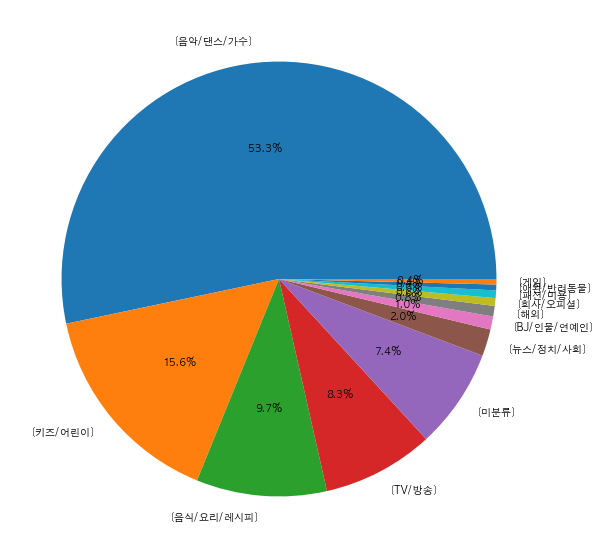

In [80]:
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

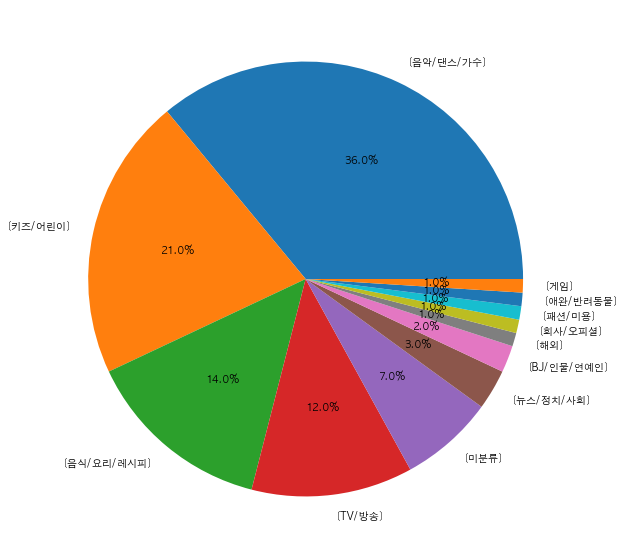

In [81]:
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%.1f%%')
plt.show()